In [1]:
%matplotlib inline

In [99]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import markdown
import sys
sys.path.append('/Users/vs522/Dropbox/Python')
import os
import glob
import re
import scipy.optimize as op
from IPython.display import Image
import seaborn as sns

from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u
from astroquery.irsa_dust import IrsaDust



In [4]:
path = '/Users/vs522/Dropbox/Gaia/'
os.chdir(path)

In [35]:
def grab_extinction(row):
    star = row.Name
    ra = row.RA_ICRS
    dec = row.DE_ICRS
    coord_string = str(ra) + 'd ' +  str(dec) + 'd'
    C = coord.SkyCoord(coord_string, frame='fk5')
    table = IrsaDust.get_extinction_table(C)
    irac_1_sandf = table[19][3]
    irac_2_sandf = table[20][3]
    analysis_df.ix[analysis_df.Name==star, 'A_3p6'] = irac_1_sandf
    analysis_df.ix[analysis_df.Name==star, 'A_4p5'] = irac_2_sandf
    print(star, irac_1_sandf, irac_2_sandf)
    return(0)
    

In [77]:
gaia_df = pd.read_csv('vizer_crossmatch.tsv', skiprows=166, skipinitialspace=True, names=('input', 'rad', 'HIP', 'TYC2', 'SolID', 'Source', 'RandomI', 'Epoch', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor', 'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'PlxpmDEcor', 'pmRApmDEcor', 'NAL', 'NAC', 'NgAL', 'NgAC', 'NbAL', 'NbAC', 'DQ', 'epsi', 'sepsi', 'APF', 'ARF', 'WAL', 'WAC', 'Apr', 'MatchObs', 'Dup', 'sK1', 'sK2', 'sK3', 'sK4', 'mK1', 'mK2', 'mK3', 'mK4', 'o_<Gmag>', '<FG>', 'e_<FG>', '<Gmag>', 'Var', 'GLON', 'GLAT', 'ELON', 'ELAT'), na_values='NOT_AVAILABLE', sep=';', comment='#')
gaia_df['ID'] = gaia_df.input.str.split('\t',0).str.get(0)

gaia_df = gaia_df.drop('input', 1)
#gaia_df = gaia_df.drop('rad', 1)
gaia_df = gaia_df.replace('', np.nan)
gaia_df['ID'] = gaia_df['ID'].replace(regex=True, to_replace=r' ',value='_')
#gaia_df['id_compare'] = map(str.lower, gaia_df.ID)
gaia_df['id_compare'] = gaia_df['ID'].map(str.lower)
gaia_df['id_compare'] = gaia_df['id_compare'].replace(regex=True, to_replace=r'_',value='')

In [78]:
info_df = pd.read_csv('rrl_average_mags', delim_whitespace=True)
info_df

,Name,Period,Type,id_compare,mag_3p6,err_3p6,amp_3p6,mag_4p5,err_4p5,amp_4p5
0,ABUma,0.600,ab,abuma,9.598,0.003,0.171,9.587,0.003,0.177
1,AMTuc,0.406,c,amtuc,10.602,0.002,0.127,10.565,0.002,0.142
2,ANSer,0.522,ab,anser,9.801,0.004,0.289,9.795,0.004,0.299
3,APSer,0.341,c,apser,10.213,0.002,0.111,10.202,0.002,0.122
4,AVPeg,0.390,ab,avpeg,9.332,0.004,0.281,9.329,0.004,0.281
5,BHPeg,0.641,ab,bhpeg,9.002,0.003,0.237,8.982,0.003,0.236
6,BXLeo,0.363,c,bxleo,10.678,0.002,0.107,10.670,0.002,0.122
7,CSEri,0.311,c,cseri,8.126,0.002,0.117,8.110,0.002,0.117
8,CUCom,0.406,d,cucom,12.258,0.002,0.142,12.229,0.002,0.211
9,DHPeg,0.256,c,dhpeg,8.610,0.004,0.305,8.662,0.008,0.852


In [79]:
printcols = ['ID', 'rad']
gaia_df[printcols]
gaia_df = gaia_df.groupby(['ID']).min()

In [80]:
gaia_df

,rad,HIP,SolID,Source,RandomI,Epoch,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,...,o_<Gmag>,<FG>,e_<FG>,<Gmag>,Var,GLON,GLAT,ELON,ELAT,id_compare
ID,,,,,,,,,,,,,,,,,,,,,
AB_Uma,0.0058,59411.0,1635378410781933568,1546016668386865792,1004237,2015.0,182.810685,0.149,47.828763,0.168,...,105,8.257196e+05,7685.37020,10.733,NaN,141.042099,67.861413,158.465090,43.874357,abuma
AM_Tuc,0.0095,6115.0,1635378410781933568,4692528057537147136,1393825,2015.0,19.627973,0.265,-67.918161,0.196,...,124,3.928950e+05,4741.63750,11.539,NaN,299.059083,-49.006000,324.481499,-64.212527,amtuc
AN_Ser,0.0026,77830.0,1635378410781933568,1191509999055192960,619871,2015.0,238.379390,0.194,12.961105,0.111,...,212,6.546377e+05,10730.71765,10.985,NaN,23.802692,45.232103,232.759715,32.403224,anser
AV_Peg,0.0042,107935.0,1635378410781933568,1793460110951463424,1471347,2015.0,328.011708,0.199,22.574791,0.202,...,85,1.103026e+06,29572.87476,10.418,NaN,77.443012,-24.053691,339.290110,33.146829,avpeg
BH_Peg,0.0169,112994.0,1635378410781933568,2828497064068310784,1634489,2015.0,343.254215,0.198,15.787682,0.130,...,104,1.159717e+06,14555.13569,10.364,NaN,85.614589,-38.356182,350.987445,21.094589,bhpeg
BX_Leo,0.0080,56742.0,1635378410781933568,3972712532526824448,1098570,2015.0,174.508478,0.222,16.543330,0.160,...,70,4.162361e+05,5720.86812,11.476,NaN,241.078445,69.984066,168.310156,12.988380,bxleo
CS_Eri,0.0240,12199.0,1635378410781933568,4947090013255935616,1248233,2015.0,39.274539,0.150,-42.963311,0.181,...,193,4.172558e+06,47371.36513,8.974,NaN,256.317812,-63.387143,15.201311,-54.053147,cseri
DX_Del,0.0036,102593.0,1635378410781933568,1760981190300823808,327366,2015.0,311.868205,0.188,12.464108,0.203,...,78,1.771644e+06,13135.50447,9.904,NaN,58.469794,-18.844886,318.268456,29.160267,dxdel
HK_Pup,0.0051,37779.0,1635378410781933568,3030561875047012352,1647035,2015.0,116.195095,0.207,-13.098978,0.159,...,111,5.056835e+05,6778.87633,11.265,NaN,230.724295,5.543249,121.137119,-33.749926,hkpup


In [81]:
merged_df = info_df.merge(gaia_df, on='id_compare')
useful = ['Name', 'Period', 'Type', 'mag_3p6', 'err_3p6', 'amp_3p6', 'mag_4p5', 'err_4p5', 'amp_4p5', 'RA_ICRS', 'DE_ICRS', 'Plx', 'e_Plx', 'id_compare']
analysis_df = merged_df[useful]
analysis_df = analysis_df.reset_index(drop=True)
analysis_df

,Name,Period,Type,mag_3p6,err_3p6,amp_3p6,mag_4p5,err_4p5,amp_4p5,RA_ICRS,DE_ICRS,Plx,e_Plx,id_compare
0,ABUma,0.600,ab,9.598,0.003,0.171,9.587,0.003,0.177,182.810685,47.828763,0.93,0.27,abuma
1,AMTuc,0.406,c,10.602,0.002,0.127,10.565,0.002,0.142,19.627973,-67.918161,0.85,0.26,amtuc
2,ANSer,0.522,ab,9.801,0.004,0.289,9.795,0.004,0.299,238.379390,12.961105,0.77,0.29,anser
3,AVPeg,0.390,ab,9.332,0.004,0.281,9.329,0.004,0.281,328.011708,22.574791,1.53,0.23,avpeg
4,BHPeg,0.641,ab,9.002,0.003,0.237,8.982,0.003,0.236,343.254215,15.787682,1.40,0.22,bhpeg
5,BXLeo,0.363,c,10.678,0.002,0.107,10.670,0.002,0.122,174.508478,16.543330,0.53,0.28,bxleo
6,CSEri,0.311,c,8.126,0.002,0.117,8.110,0.002,0.117,39.274539,-42.963311,2.16,0.23,cseri
7,DXDel,0.473,ab,8.653,0.004,0.249,8.641,0.004,0.258,311.868205,12.464108,1.66,0.22,dxdel
8,HKPup,0.734,ab,9.884,0.004,0.252,9.854,0.004,0.257,116.195095,-13.098978,0.53,0.26,hkpup
9,MTTel,0.317,c,8.078,0.002,0.126,8.064,0.002,0.111,285.550322,-46.653841,1.43,0.31,mttel


In [82]:
analysis_df.apply(lambda line: grab_extinction(line), axis=1);

/Users/vs522/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


ABUma 0.005 0.004
AMTuc 0.004 0.004
ANSer 0.007 0.006
AVPeg 0.013 0.011
BHPeg 0.015 0.012
BXLeo 0.005 0.004
CSEri 0.004 0.003
DXDel 0.024 0.02
HKPup 0.064 0.053
MTTel 0.011 0.009
RRGem 0.012 0.01
RRLyr 0.018 0.015
RUPsc 0.008 0.007
RvCrB 0.008 0.006
RVUma 0.003 0.003
RXEri 0.012 0.01
RZCep 0.187 0.155
STBoo 0.004 0.003
STCVn 0.003 0.002
SUDra 0.002 0.001
SVEri 0.016 0.014
SVHya 0.015 0.013
SVScl 0.003 0.002
SWAnd 0.008 0.007
SWDra 0.003 0.002
SXUma 0.002 0.002
TTLyn 0.003 0.003
TUUma 0.004 0.003
TVBoo 0.002 0.001
TWHer 0.008 0.006
UUVir 0.003 0.003
UVOct 0.018 0.015
UYBoo 0.007 0.006
V440Sgr 0.017 0.014
VXHer 0.009 0.007
VInd 0.009 0.007
WYAnt 0.012 0.01
XZCyg 0.023 0.019
XAri 0.037 0.031
YZCap 0.012 0.01


In [83]:
analysis_df['e_gks'] = analysis_df.apply(lambda x : np.sqrt((0.79*x['e_Plx'])**2 - (0.10)**2), axis=1)

In [84]:
analysis_df['log_P'] = np.log10(analysis_df['Period'])
analysis_df['logP_f'] = np.where(analysis_df['Type']=='c', analysis_df['log_P'] + 0.127, analysis_df['log_P'])

In [85]:
analysis_df

,Name,Period,Type,mag_3p6,err_3p6,amp_3p6,mag_4p5,err_4p5,amp_4p5,RA_ICRS,DE_ICRS,Plx,e_Plx,id_compare,A_3p6,A_4p5,e_gks,log_P,logP_f
0,ABUma,0.600,ab,9.598,0.003,0.171,9.587,0.003,0.177,182.810685,47.828763,0.93,0.27,abuma,0.005,0.004,0.188406,-0.221849,-0.221849
1,AMTuc,0.406,c,10.602,0.002,0.127,10.565,0.002,0.142,19.627973,-67.918161,0.85,0.26,amtuc,0.004,0.004,0.179413,-0.391474,-0.264474
2,ANSer,0.522,ab,9.801,0.004,0.289,9.795,0.004,0.299,238.379390,12.961105,0.77,0.29,anser,0.007,0.006,0.206123,-0.282329,-0.282329
3,AVPeg,0.390,ab,9.332,0.004,0.281,9.329,0.004,0.281,328.011708,22.574791,1.53,0.23,avpeg,0.013,0.011,0.151707,-0.408935,-0.408935
4,BHPeg,0.641,ab,9.002,0.003,0.237,8.982,0.003,0.236,343.254215,15.787682,1.40,0.22,bhpeg,0.015,0.012,0.142149,-0.193142,-0.193142
5,BXLeo,0.363,c,10.678,0.002,0.107,10.670,0.002,0.122,174.508478,16.543330,0.53,0.28,bxleo,0.005,0.004,0.197305,-0.440093,-0.313093
6,CSEri,0.311,c,8.126,0.002,0.117,8.110,0.002,0.117,39.274539,-42.963311,2.16,0.23,cseri,0.004,0.003,0.151707,-0.507240,-0.380240
7,DXDel,0.473,ab,8.653,0.004,0.249,8.641,0.004,0.258,311.868205,12.464108,1.66,0.22,dxdel,0.024,0.020,0.142149,-0.325139,-0.325139
8,HKPup,0.734,ab,9.884,0.004,0.252,9.854,0.004,0.257,116.195095,-13.098978,0.53,0.26,hkpup,0.064,0.053,0.179413,-0.134304,-0.134304
9,MTTel,0.317,c,8.078,0.002,0.126,8.064,0.002,0.111,285.550322,-46.653841,1.43,0.31,mttel,0.011,0.009,0.223553,-0.498941,-0.371941


In [86]:
feast_df = pd.read_csv('Feast_2008.tsv', sep=';', skiprows=64, names=('HIP', 'Name', 'plx', 'e_plx', 'Vmag', 'Jmag', 'Hmag', 'Ksmag', 'Per', '[Fe/H]', 'E(B-V)', 'Type', 'Simbad', '_RA', '_DE'))

feast_df['id_compare'] = feast_df['Name'].map(str.lower)
feast_df['id_compare'] = feast_df['id_compare'].replace(regex=True, to_replace=r' ',value='')
feast_metals = ['id_compare', '[Fe/H]']
feast_df

,HIP,Name,plx,e_plx,Vmag,Jmag,Hmag,Ksmag,Per,[Fe/H],E(B-V),Type,Simbad,_RA,_DE,id_compare
0,226,RU Scl,0.99,1.96,10.22,9.474,9.294,9.229,0.493347,-1.27,0.018,,Simbad,0.70046,-24.94530,ruscl
1,320,UU Cet,1.59,5.73,12.08,11.137,10.863,10.837,0.606080,-1.28,0.021,,Simbad,1.02135,-16.99764,uucet
2,1878,SW And,-0.01,1.84,9.71,8.809,8.578,8.505,0.442262,-0.24,0.038,,Simbad,5.92954,29.40101,swand
3,2655,RX Cet,3.24,4.74,11.44,10.606,10.378,10.319,0.573685,-1.28,0.025,,Simbad,8.40952,-15.48745,rxcet
4,4541,W Tuc,5.37,2.41,11.41,10.594,10.373,10.344,0.642260,-1.57,0.021,,Simbad,14.54042,-63.39566,wtuc
5,4725,RU Cet,7.14,4.62,11.68,10.597,10.487,10.465,0.586267,-1.66,0.023,,Simbad,15.16792,-15.95768,rucet
6,5803,RU Psc,1.30,2.08,10.19,9.347,9.162,9.117,0.390333,-1.75,0.043,c,Simbad,18.60849,24.41566,rupsc
7,6029,XX And,-0.79,2.50,10.68,9.727,9.488,9.409,0.722755,-1.94,0.039,,Simbad,19.36423,38.95056,xxand
8,6094,VW Scl,2.34,2.79,11.03,10.418,10.193,10.136,0.510913,-0.84,0.016,,Simbad,19.56238,-39.21246,vwscl
9,6115,AM Tuc,-1.93,2.28,11.67,10.865,10.617,10.563,0.405769,-1.49,0.023,c,Simbad,19.62770,-67.91804,amtuc


In [87]:
analysis_df = analysis_df.merge(feast_df[feast_metals], on='id_compare')

In [88]:
analysis_df

,Name,Period,Type,mag_3p6,err_3p6,amp_3p6,mag_4p5,err_4p5,amp_4p5,RA_ICRS,DE_ICRS,Plx,e_Plx,id_compare,A_3p6,A_4p5,e_gks,log_P,logP_f,[Fe/H]
0,ABUma,0.600,ab,9.598,0.003,0.171,9.587,0.003,0.177,182.810685,47.828763,0.93,0.27,abuma,0.005,0.004,0.188406,-0.221849,-0.221849,-0.49
1,AMTuc,0.406,c,10.602,0.002,0.127,10.565,0.002,0.142,19.627973,-67.918161,0.85,0.26,amtuc,0.004,0.004,0.179413,-0.391474,-0.264474,-1.49
2,ANSer,0.522,ab,9.801,0.004,0.289,9.795,0.004,0.299,238.379390,12.961105,0.77,0.29,anser,0.007,0.006,0.206123,-0.282329,-0.282329,-0.07
3,AVPeg,0.390,ab,9.332,0.004,0.281,9.329,0.004,0.281,328.011708,22.574791,1.53,0.23,avpeg,0.013,0.011,0.151707,-0.408935,-0.408935,-0.08
4,BHPeg,0.641,ab,9.002,0.003,0.237,8.982,0.003,0.236,343.254215,15.787682,1.40,0.22,bhpeg,0.015,0.012,0.142149,-0.193142,-0.193142,-1.22
5,BXLeo,0.363,c,10.678,0.002,0.107,10.670,0.002,0.122,174.508478,16.543330,0.53,0.28,bxleo,0.005,0.004,0.197305,-0.440093,-0.313093,-1.28
6,CSEri,0.311,c,8.126,0.002,0.117,8.110,0.002,0.117,39.274539,-42.963311,2.16,0.23,cseri,0.004,0.003,0.151707,-0.507240,-0.380240,-1.41
7,DXDel,0.473,ab,8.653,0.004,0.249,8.641,0.004,0.258,311.868205,12.464108,1.66,0.22,dxdel,0.024,0.020,0.142149,-0.325139,-0.325139,-0.39
8,HKPup,0.734,ab,9.884,0.004,0.252,9.854,0.004,0.257,116.195095,-13.098978,0.53,0.26,hkpup,0.064,0.053,0.179413,-0.134304,-0.134304,-1.11
9,MTTel,0.317,c,8.078,0.002,0.126,8.064,0.002,0.111,285.550322,-46.653841,1.43,0.31,mttel,0.011,0.009,0.223553,-0.498941,-0.371941,-1.85


In [90]:
def abs_mag_errs(row):
    mag_36 = row.mag_3p6
    mag_45 = row.mag_4p5
    e_mag_36 = row.err_3p6
    e_mag_45 = row.err_4p5
    plx = row.Plx
    e_plx = row.e_gks
    a_36 = row.A_3p6
    a_45 = row.A_4p5
    star = row.Name
    
    d = 1./(plx * 1e-3)
    mu = 5.0*np.log10(d) - 5.0
    abs_36 = mag_36 - mu - a_36
    abs_45 = mag_45 - mu - a_45
    
    sigma_a = 0.005
    
    variance_abs_36 = e_mag_36**2 + ((5* e_plx**2)/(plx*np.log(10.)))**2 + sigma_a**2
    variance_abs_45 = e_mag_45**2 + ((5* e_plx**2)/(plx*np.log(10.)))**2 + sigma_a**2

    sigma_abs_36 = np.sqrt(variance_abs_36)
    sigma_abs_45 = np.sqrt(variance_abs_45)

    analysis_df.ix[analysis_df.Name==star, 'M_3p6'] = abs_36
    analysis_df.ix[analysis_df.Name==star, 'M_4p5'] = abs_45


    analysis_df.ix[analysis_df.Name==star, 'e_M_3p6'] = sigma_abs_36
    analysis_df.ix[analysis_df.Name==star, 'e_M_4p5'] = sigma_abs_45
    print (star, abs_36, abs_45, variance_abs_36, variance_abs_45, sigma_abs_36, sigma_abs_45)
    return(0)


In [91]:
analysis_df.apply(lambda line: abs_mag_errs(line), axis=1)

ABUma -0.56458525723 -0.57458525723 0.00690347177808 0.00690347177808 0.0830871336494 0.0830871336494
AMTuc 0.245094628571 0.208094628571 0.00679123200765 0.00679123200765 0.0824089316012 0.0824089316012
ANSer -0.773546374138 -0.778546374138 0.0143970654637 0.0143970654637 0.119987772142 0.119987772142
AVPeg 0.242457154088 0.241457154088 0.00110794879355 0.00110794879355 0.0332858647709 0.0332858647709
BHPeg -0.282359821609 -0.299359821609 0.00101627291974 0.00101627291974 0.0318790357405 0.0318790357405
BXLeo -0.705620651996 -0.712620651996 0.0254687714288 0.0254687714288 0.159589383822 0.159589383822
CSEri -0.205731244245 -0.220731244245 0.000564326738428 0.000564326738428 0.0237555622629 0.0237555622629
DXDel -0.2704595598 -0.2784595598 0.000739669953077 0.000739669953077 0.0271968739578 0.0271968739578
HKPup -1.558620652 -1.577620652 0.0174340673746 0.0174340673746 0.132038128488 0.132038128488
MTTel -1.15631981267 -1.16831981267 0.00578816758298 0.00578816758298 0.0760800077746 0.

/Users/vs522/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

In [92]:
analysis_df

,Name,Period,Type,mag_3p6,err_3p6,amp_3p6,mag_4p5,err_4p5,amp_4p5,RA_ICRS,...,A_3p6,A_4p5,e_gks,log_P,logP_f,[Fe/H],M_3p6,M_4p5,e_M_3p6,e_M_4p5
0,ABUma,0.600,ab,9.598,0.003,0.171,9.587,0.003,0.177,182.810685,...,0.005,0.004,0.188406,-0.221849,-0.221849,-0.49,-0.564585,-0.574585,0.083087,0.083087
1,AMTuc,0.406,c,10.602,0.002,0.127,10.565,0.002,0.142,19.627973,...,0.004,0.004,0.179413,-0.391474,-0.264474,-1.49,0.245095,0.208095,0.082409,0.082409
2,ANSer,0.522,ab,9.801,0.004,0.289,9.795,0.004,0.299,238.379390,...,0.007,0.006,0.206123,-0.282329,-0.282329,-0.07,-0.773546,-0.778546,0.119988,0.119988
3,AVPeg,0.390,ab,9.332,0.004,0.281,9.329,0.004,0.281,328.011708,...,0.013,0.011,0.151707,-0.408935,-0.408935,-0.08,0.242457,0.241457,0.033286,0.033286
4,BHPeg,0.641,ab,9.002,0.003,0.237,8.982,0.003,0.236,343.254215,...,0.015,0.012,0.142149,-0.193142,-0.193142,-1.22,-0.282360,-0.299360,0.031879,0.031879
5,BXLeo,0.363,c,10.678,0.002,0.107,10.670,0.002,0.122,174.508478,...,0.005,0.004,0.197305,-0.440093,-0.313093,-1.28,-0.705621,-0.712621,0.159589,0.159589
6,CSEri,0.311,c,8.126,0.002,0.117,8.110,0.002,0.117,39.274539,...,0.004,0.003,0.151707,-0.507240,-0.380240,-1.41,-0.205731,-0.220731,0.023756,0.023756
7,DXDel,0.473,ab,8.653,0.004,0.249,8.641,0.004,0.258,311.868205,...,0.024,0.020,0.142149,-0.325139,-0.325139,-0.39,-0.270460,-0.278460,0.027197,0.027197
8,HKPup,0.734,ab,9.884,0.004,0.252,9.854,0.004,0.257,116.195095,...,0.064,0.053,0.179413,-0.134304,-0.134304,-1.11,-1.558621,-1.577621,0.132038,0.132038
9,MTTel,0.317,c,8.078,0.002,0.126,8.064,0.002,0.111,285.550322,...,0.011,0.009,0.223553,-0.498941,-0.371941,-1.85,-1.156320,-1.168320,0.076080,0.076080


# Neeley 2017 PLZ

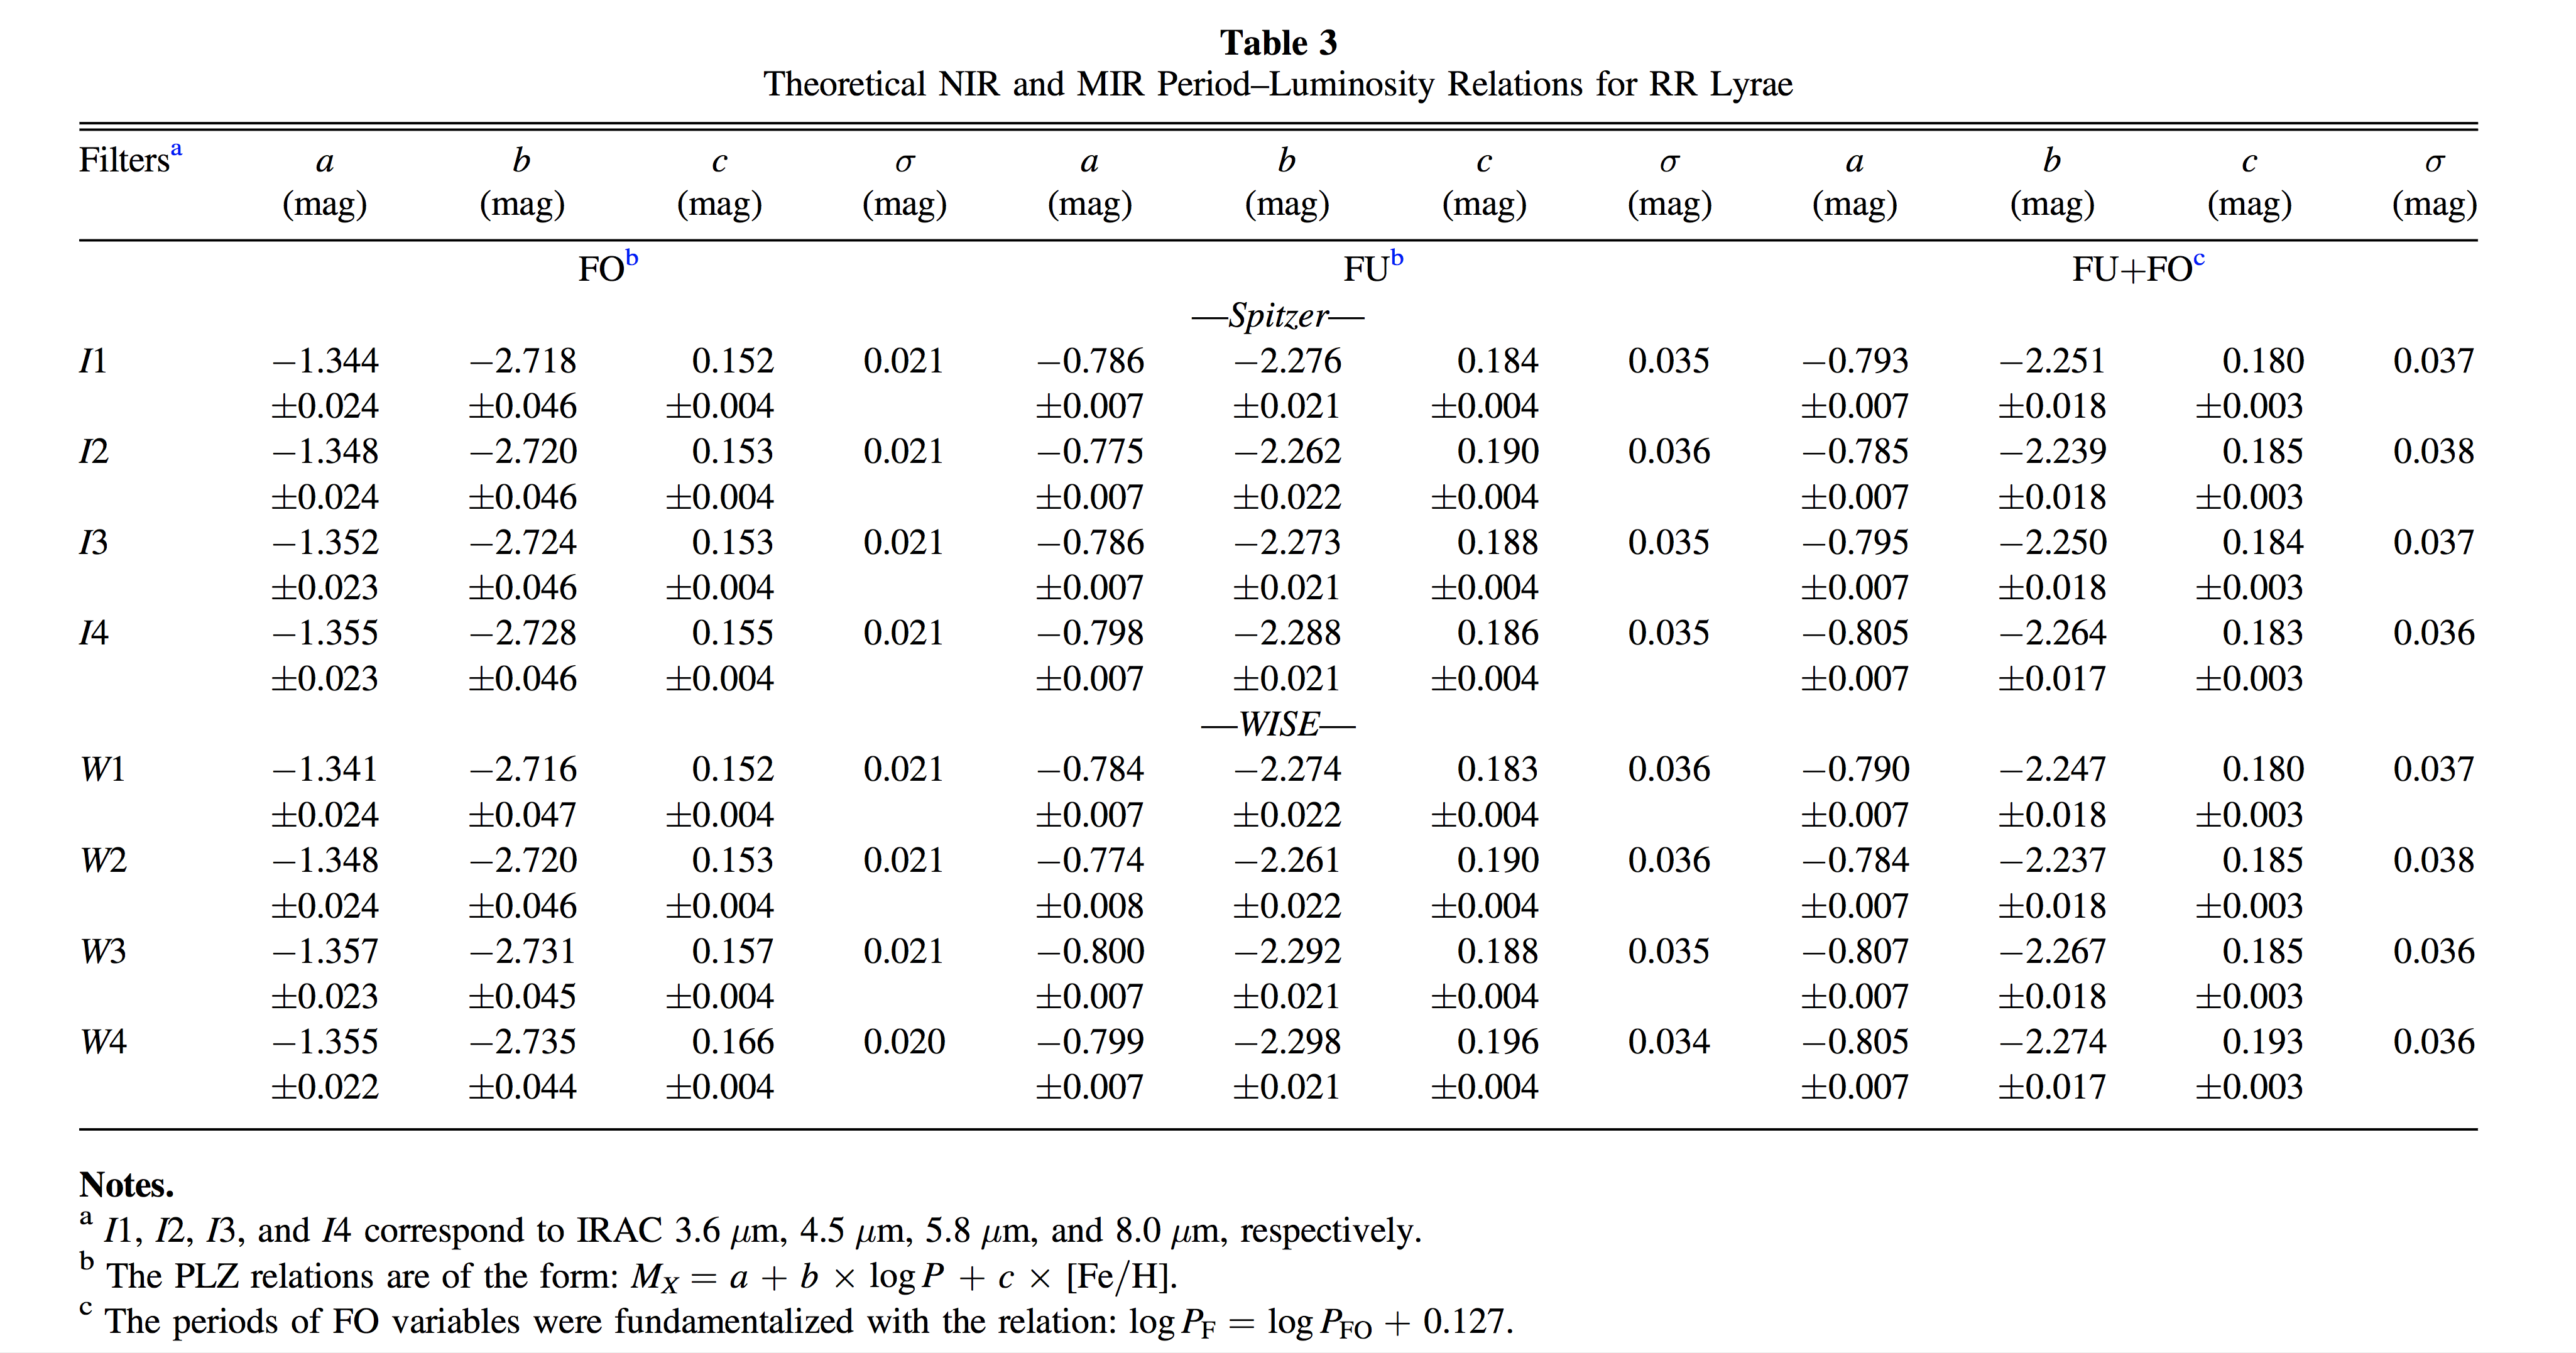

In [96]:
Image("neeley2017_plz.png")

In [97]:
analysis_df.columns

Index(['Name', 'Period', 'Type', 'mag_3p6', 'err_3p6', 'amp_3p6', 'mag_4p5',
       'err_4p5', 'amp_4p5', 'RA_ICRS', 'DE_ICRS', 'Plx', 'e_Plx',
       'id_compare', 'A_3p6', 'A_4p5', 'e_gks', 'log_P', 'logP_f', '[Fe/H]',
       'M_3p6', 'M_4p5', 'e_M_3p6', 'e_M_4p5'],
      dtype='object')

(1, -2)

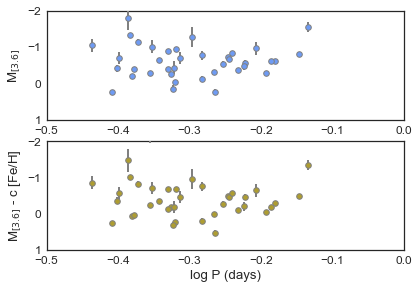

In [111]:
sns.set_style("white")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("husl", 10)

colors = sns.color_palette()
ax1 = mp.subplot(211)

logp = analysis_df.logP_f
mag1 = analysis_df.M_3p6
err1 = analysis_df.e_M_3p6
metal = analysis_df['[Fe/H]']

ax1.errorbar(logp, mag1, yerr=err1, ls='None',zorder=4, color='Grey')
ax1.plot(logp, mag1,'o', color=colors[7], ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1,label='No metallicity correction')
mp.ylabel('M$_{[3.6]}$')
mp.xlim(-0.5, 0.0)
mp.ylim(1, -2)


### neeley coeffs FO + FU

a1 = -0.793
b1 = -2.251
c1 = 0.180

fe_mag = mag1 - c1*metal

ax2 = mp.subplot(212)

ax2.errorbar(logp, fe_mag, yerr=err1, ls='None',zorder=4, color='Grey')
ax2.plot(logp, fe_mag,'o', color=colors[2], ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1,label='Metallicity correction applied')


mp.xlabel('log P (days)')
mp.ylabel('M$_{[3.6]}$ - c [Fe/H]')

mp.xlim(-0.5, 0.0)
mp.ylim(1, -2)
